In [1]:
import json
import sys
sys.path.append('../py')
import myutils as my
import importlib
importlib.reload(my)
import json
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch, Rectangle
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.patheffects as path_effects
from matplotlib.ticker import MaxNLocator
from matplotlib import rc
from matplotlib.gridspec import GridSpec
from matplotlib import ticker

# plt.rcParams["font.family"] = "serif"
# plt.rcParams["mathtext.fontset"] = "dejavuserif"

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{xcolor}'

from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)


pgf_with_latex = {
    "text.usetex": True,            # use LaTeX to write all text
    "pgf.rcfonts": False,           # Ignore Matplotlibrc
    "pgf.preamble": 
        r'\usepackage{xcolor}'     # xcolor for colours
    
}
matplotlib.rcParams.update(pgf_with_latex)

matplotlib.rcParams['agg.path.chunksize'] = 10000

recalculate = recompile = True

def set_ticks(ax_all, N=6, cut_x = 0.15, cut_y = 0.2):
    for ax in ax_all:
        ax.tick_params(axis='both', labelsize=6)
        ax.margins(x=0.)

        box = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        box_w = box.width
        box_h = box.height

        if ax.get_xscale() == "log":
            ax.xaxis.set_major_locator(ticker.LogLocator(numticks=N))
        else:
            ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=N))

        if ax.get_yscale() == "log":
            ax.yaxis.set_major_locator(ticker.LogLocator(numticks=N))
            ax.yaxis.set_minor_locator(ticker.LogLocator(subs="auto", numticks=10))
        else:
            ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=N))

        (x0, x1) = ax.get_xlim()
        (y0, y1) = ax.get_ylim()


        x0 = ax.dataLim.x0
        x1 = ax.dataLim.x1
        y0 = ax.dataLim.y0
        y1 = ax.dataLim.y1



        axis_to_data = ax.transAxes + ax.transData.inverted()
        (x2, y2) = axis_to_data.transform([1 - cut_x/box.width, 1 - cut_y/box.height])
        (x0, y0) = axis_to_data.transform([-0.1, -0.1])

        # print(x0, x1, x2)
        # print(y0, y1, y2)


        ax.set_xticks([tick for tick in ax.get_xticks() if tick <= x2])
        ax.set_yticks([tick for tick in ax.get_yticks() if tick >= y0 and tick <= y2])

        # print(ax.get_yticklabels())

        if ax.get_yscale() == "log":       
            ax.set_yticklabels([label.get_text().replace("-", "\\mbox{-}") for label in ax.get_yticklabels()])
        # print(ax.get_yticklabels())

def set_labels(ax, x_label, y_label):
    box = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    
    if x_label:
        ax.text(1, -0.05/box.height, x_label, transform=ax.transAxes, va="top", ha="right")
    if y_label:
        ax.text(-0.03/box.width, 1,  y_label, transform=ax.transAxes, va="top", ha="right")

~~~ ../cpp/equation_specific/ndde_relay_solution.cpp is executed ~~~
~~~  parameters: {"h": 0.01, "t_finish": 5, "T": 1.0, "alpha": 1.0, "eps": 0.1, "A": 0.1, "w": 6, "gamma": 0.0} ~~~
[0.136588, -0.0378993, -0.00387292, -0.0524546, 0.031695, -0.126689, 0.0462783, -0.0373775, 0.013216, -0.0200011, 0.136588]
0.136588
[-1.13659, -0.962101, 1.00387, -0.947545, 0.968305, -0.873311, 0.953722, -0.962623, 0.986784, -0.979999, -1.13659]
0.873311
delta = 0.431706
epsilon = 0.152255
~~~ Computation took 0:0:0 (hh:mm:ss) ~~~
~~~ ../cpp/equation_specific/ndde_relay_solution.cpp is finished ~~~


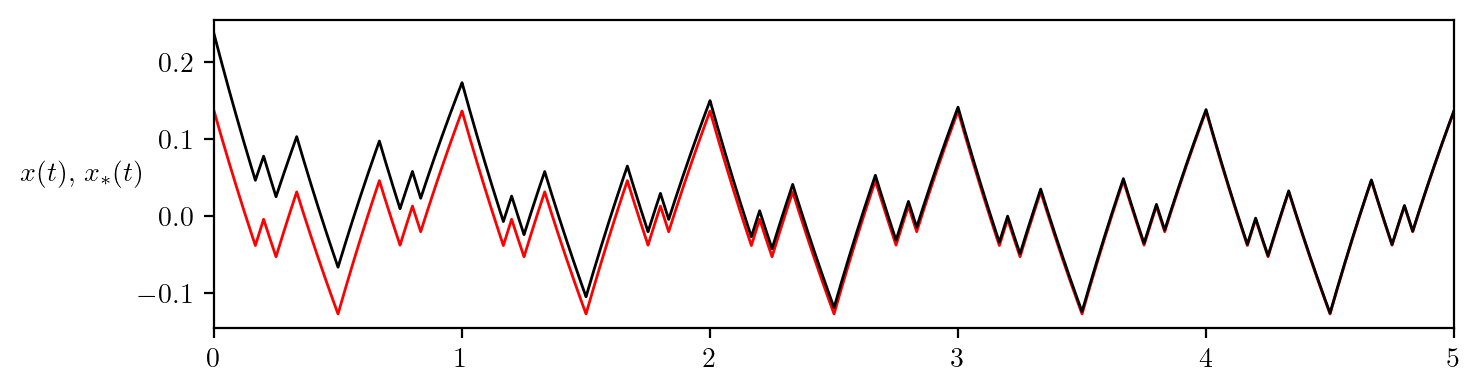

In [393]:
params = dict(
    h = 0.01,
    t_finish = 5,
    
    T = 1.0,
    alpha = 1.,
    eps = 0.1,
    
    A=0.1, w=6, gamma=0.
)

compiler_params = dict(
    RK = "RK98_",
    REAL = "float64"
)

script = "equation_specific/ndde_relay_solution"

# recompile=True
recompile=False
        
ts, xs, ts2, xs2, true_xs = my.run_cpp(script, params, compiler_params, recalculate=recalculate, recompile=recompile, flags = "-O3")    

fig, ax = plt.subplots(1,1, figsize=(8,2),dpi=200)

ax.plot(ts, xs,lw=1,c='r')
ax.plot(ts2, xs2,lw=1,c='k')


# ax.plot(ts, true_xs,lw=3,c='g')
# ax.plot(ts, xs, lw=1,c='k')
# ax.plot(ts2, xs2, lw=1,c='k')
# ax.plot(ts + 2*params["T"], xs, lw=1)
ax.margins(x=0)

ax.set_ylabel(r"$x(t)$, \textcolor{red}{$x_*(t)$}", rotation=0,labelpad=20,y=0.5, va='center')

plt.savefig(f"../output/{script.replace('/', '::')} {compiler_params} {params}.pdf".replace('{', "").replace('}', ""), format="pdf", dpi=1000,bbox_inches='tight',pad_inches=0.01,transparent=True,backend='pgf')

# ax.set_xlim(params["t_finish"] - 2*params["tau"],params["t_finish"])


# T = params["T"]
# t_finish = params["t_finish"]



# def animate(i):
#     ax.set_xlim(2*tau*i, 2*tau*(i+1))
#     # return

# ani = animation.FuncAnimation(fig, animate, repeat=True,
#                                     frames=int(t_finish/(2*tau)), interval=50)

# writer = animation.PillowWriter(fps=10,
#                                 metadata=dict(artist='Me'),
#                                 bitrate=1800)

# ani.save('time_series.gif', writer=writer)

~~~ ../cpp/equation_specific/ndde_regular_solution.cpp is executed ~~~
~~~  parameters: {"h": 0.00019, "t_finish": 10, "T": 1.0, "alpha": -3.0, "eps": 1, "k": 2, "A": 0, "p": 0, "mu": 0} ~~~
[0.656087, 0.931504, -1.14289, -0.656087]
1.14289
[2.34391, 2.0685, -1.85711, -2.34391]
1.85711
delta = 0.309518
epsilon = 0.230282
~~~ Computation took 0:0:0 (hh:mm:ss) ~~~
~~~ ../cpp/equation_specific/ndde_regular_solution.cpp is finished ~~~
0.8402052043181646


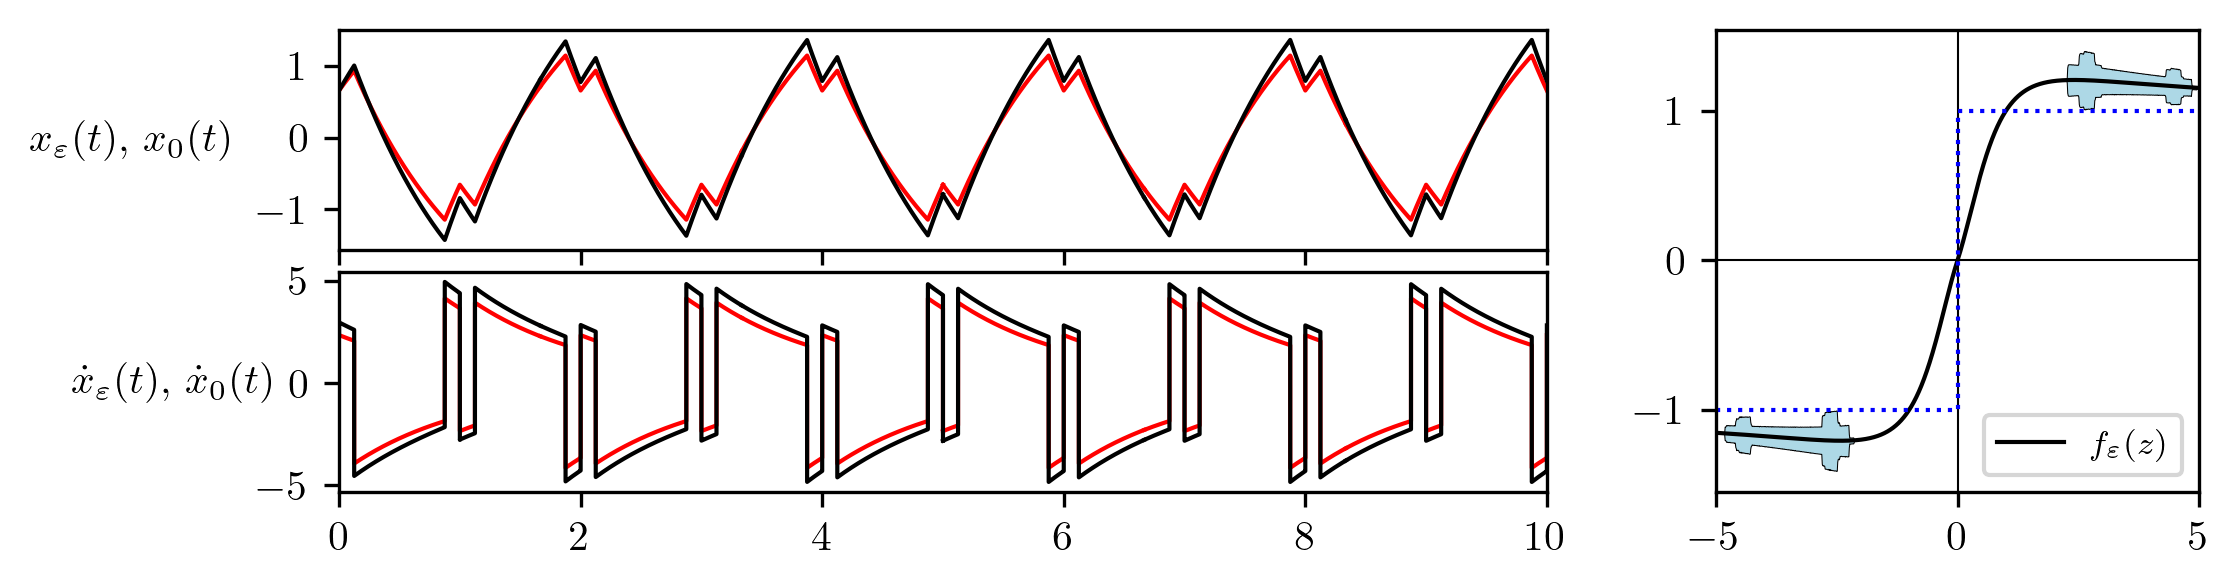

In [389]:
params = dict(
    h = 0.00019,
    t_finish = 10,
    
    T = 1.0,
    alpha = -3.,
    eps = 1,
    
    k=2,
    
    # A=0.5, p = 1, mu = 2,
    A=0, p = 0, mu = 0,
    # A=20, p = 12, mu = 0.052
)

compiler_params = dict(
    # RK = "RK98_",
    # REAL = "float64",
    # EQ = "RelayNDDE1arctan_sin",
    EQ = "RelayNDDEr1",
    # EQ = "RelayNDDEexpsin",
)

script = "equation_specific/ndde_regular_solution"

recompile=True
# recompile=False
recalculate=True
        
ts, xs, dot_xs, reference, dot_reference, zs, fs = my.run_cpp(script, params, compiler_params, recalculate=recalculate, recompile=recompile, flags = "-O3")    

# fig, ax = plt.subplots(1,1, figsize=(8,2),dpi=200)

fig = plt.figure(figsize=(8,2),dpi=300)

# gs = GridSpec(nrows=2, ncols=3, width_ratios=[1, 1, 1.3], height_ratios=[3,2],hspace=0.15,wspace=0.25)
gs = GridSpec(nrows=2, ncols=2, width_ratios=[3, 1.2], height_ratios=[2,2],hspace=0.1,wspace=0.2)

ax_sol  = plt.subplot(gs[0,0])
ax_dot  = plt.subplot(gs[1,0], sharex=ax_sol)
# ax_diff  = plt.subplot(gs[2,0], sharex=ax_sol)
ax_f  = plt.subplot(gs[:,1])


ax_f.plot(zs, fs, color='k', lw=1, label=r"$f_\varepsilon(z)$")
count, bins = np.histogram(dot_xs, bins=zs[::10], density=True)
count = 0.5*count
ax_f.fill_between(bins[1:], fs[10::10] - count, fs[10::10]+count, color='lightblue', alpha=1, edgecolor='k', lw=0.25)
ax_f.axhline(y=0, color='k', lw=0.5)
ax_f.axvline(x=0, color='k', lw=0.5)
ax_f.margins(x=0)
plot_sign = ax_f.plot([-5,0,0,5], [-1,-1,1,1], color='b',lw=1, linestyle=':')
plt.legend(loc='lower right',fontsize=8)



print(np.max(reference)/np.max(xs))
# xs = xs* np.max(reference[-1000:])/np.max(xs[-1000:])
ax_sol.plot(ts, reference,lw=1,c='r')
ax_sol.plot(ts, xs,lw=1,c='k')
# ax.plot(ts + 8*params["T"], xs-reference, lw=1)
# ax.plot(ts, xs-reference,lw=1,c='k')
ax_dot.plot(ts, dot_reference,lw=1,c='r')
ax_dot.plot(ts, dot_xs,lw=1,c='k')

second_half = ts > params["t_finish"]/2

ax_sol.margins(x=0)

ax_sol.tick_params(axis='x', labelbottom=False)  # Hides x-axis tick labels for ax1

ax_sol.set_ylabel(r"$x_\varepsilon(t)$, \textcolor{red}{$x_0(t)$}", rotation=0,labelpad=30,y=0.5, va='center')
ax_dot.set_ylabel(r"$\dot x_\varepsilon(t)$, \textcolor{red}{$\dot x_0(t)$}", rotation=0,labelpad=20,y=0.5, va='center')
# ax_sol.set_xticklabels([])  # Hide x-axis tick labels

# set_ticks([ax_sol, ax_dot], N=3)

# ax_sol.text(0.5, 0.5, r'\textcolor{red}{Red Text}', fontsize=15, ha='center')

# ax_diff.plot(ts, xs - reference*np.max(xs[second_half])/np.max(reference[second_half]), lw=1, c='blue')

# ax.margins(x=0)
ax_sol.set_xlim(params["t_finish"] - 10*params["T"],params["t_finish"])

plt.savefig(f"../output/{script.replace('/', '::')} {compiler_params} {params}.pdf", format="pdf", dpi=1000,bbox_inches='tight',pad_inches=0.01,transparent=True,backend='pgf')

~~~ ../cpp/equation_specific/ndde_regular_solution.cpp is executed ~~~
~~~  parameters: {"h": 0.00019, "t_finish": 100, "T": 1.0, "alpha": -3.0, "eps": 0.5, "k": 0, "A": 4, "p": 2, "mu": 0.15} ~~~
[-1.38635, 1.38635]
1.38635
[4.38635, -4.38635]
4.38635
delta = 0.268941
epsilon = 0.173003
~~~ Computation took 0:0:7 (hh:mm:ss) ~~~
~~~ ../cpp/equation_specific/ndde_regular_solution.cpp is finished ~~~
1.3101563140081498


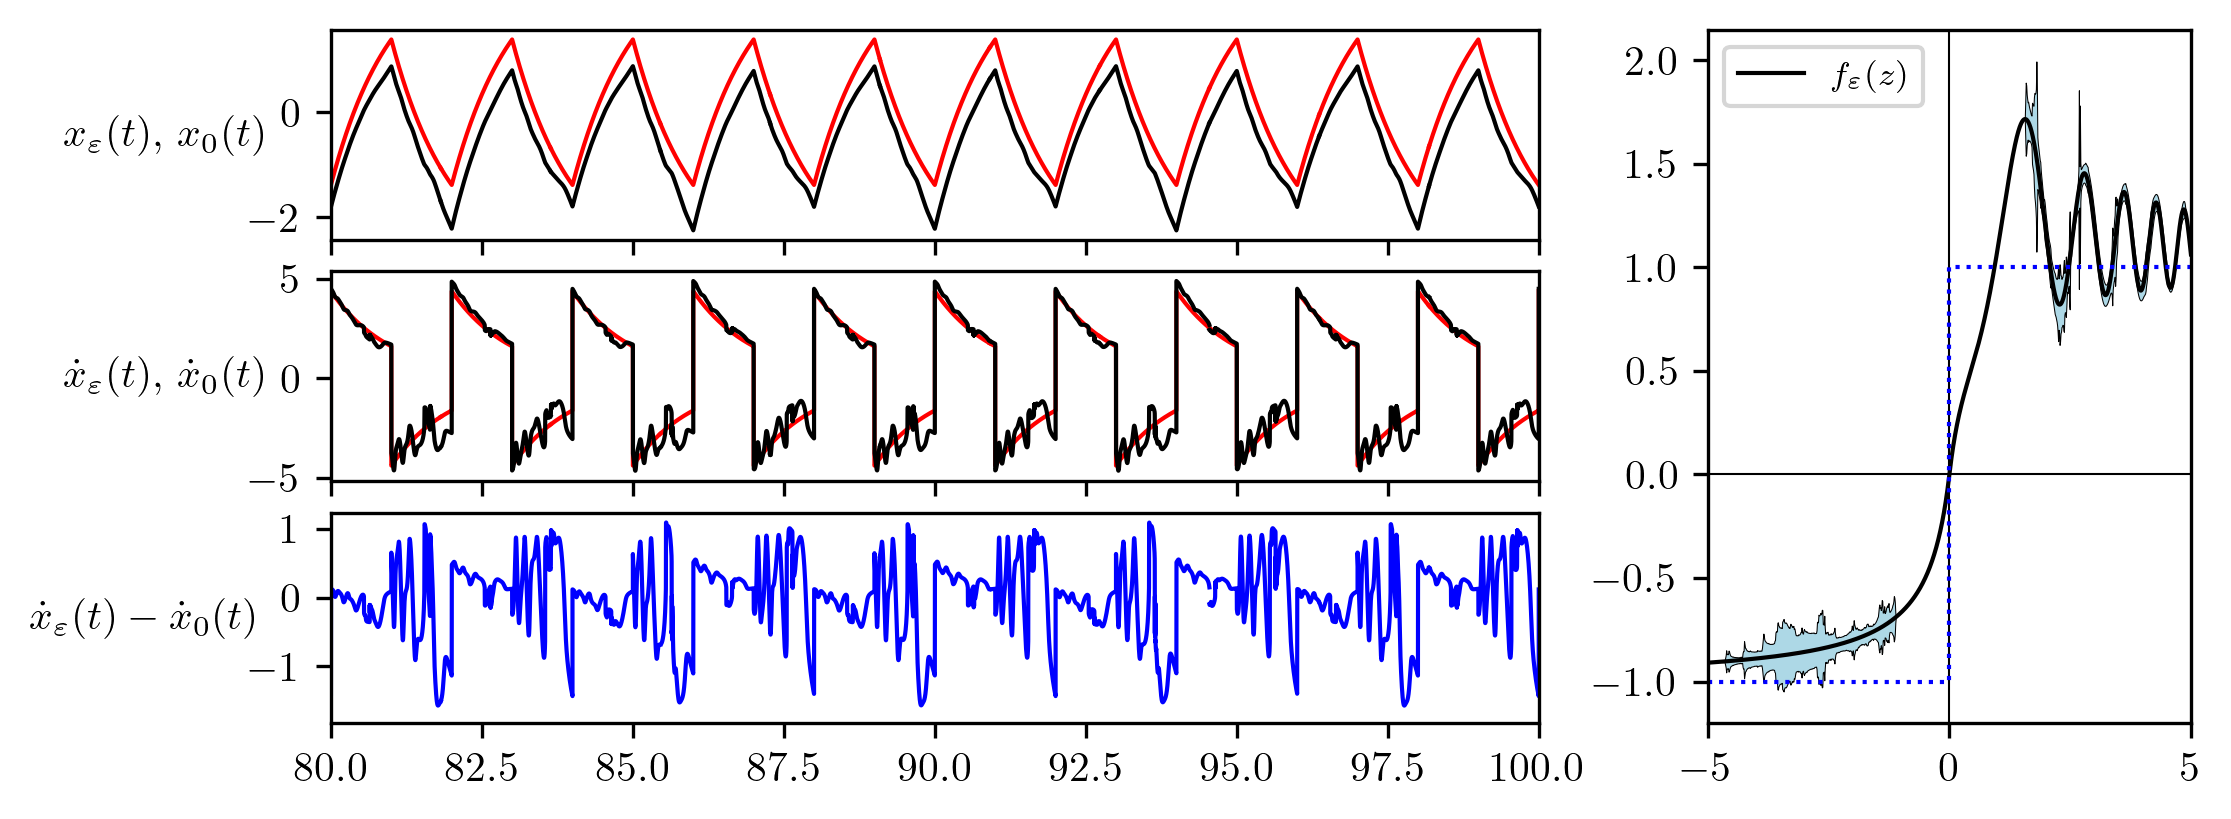

In [381]:
params = dict(
    h = 0.00019,
    t_finish = 100,
    
    T = 1.0,
    alpha = -3.,
    eps = 0.5,
    
    k=0,
    
    A=4, p = 2, mu = 0.15,
    # A=20, p = 12, mu = 0.052
)

compiler_params = dict(
    # RK = "RK98_",
    # REAL = "float64",
    EQ = "RelayNDDEspikes",
    # EQ = "RelayNDDE1arctan",
)

script = "equation_specific/ndde_regular_solution"

recompile=True
# recompile=False
        
ts, xs, dot_xs, reference, dot_reference, zs, fs = my.run_cpp(script, params, compiler_params, recalculate=recalculate, recompile=recompile, flags = "-O3")    

# fig, ax = plt.subplots(1,1, figsize=(8,2),dpi=200)

fig = plt.figure(figsize=(8,3),dpi=300)

# gs = GridSpec(nrows=2, ncols=3, width_ratios=[1, 1, 1.3], height_ratios=[3,2],hspace=0.15,wspace=0.25)
gs = GridSpec(nrows=3, ncols=2, width_ratios=[3, 1.2], height_ratios=[2,2,2],hspace=0.15,wspace=0.2)

ax_sol  = plt.subplot(gs[0,0])
ax_dot  = plt.subplot(gs[1,0], sharex=ax_sol)
ax_diff  = plt.subplot(gs[2,0], sharex=ax_sol)
ax_f  = plt.subplot(gs[:,1])


ax_f.plot(zs, fs, color='k', lw=1, label=r"$f_\varepsilon(z)$")
count, bins = np.histogram(dot_xs, bins=zs[::10], density=True)
count = 0.5*count
ax_f.fill_between(bins[1:], fs[10::10] - count, fs[10::10]+count, color='lightblue', alpha=1, edgecolor='k', lw=0.25)
ax_f.axhline(y=0, color='k', lw=0.5)
ax_f.axvline(x=0, color='k', lw=0.5)
ax_f.margins(x=0)
plot_sign = ax_f.plot([-5,0,0,5], [-1,-1,1,1], color='b',lw=1, linestyle=':')
plt.legend(loc='upper left',fontsize=8)


print(np.max(reference)/np.max(xs))
# xs = xs* np.max(reference[-1000:])/np.max(xs[-1000:])
ax_sol.plot(ts, reference,lw=1,c='r')
ax_sol.plot(ts, xs,lw=1,c='k')
# ax.plot(ts + 8*params["T"], xs-reference, lw=1)
# ax.plot(ts, xs-reference,lw=1,c='k')
ax_dot.plot(ts, dot_reference,lw=1,c='r')
ax_dot.plot(ts, dot_xs,lw=1,c='k')

second_half = ts > params["t_finish"]/2

ax_sol.margins(x=0)

ax_sol.tick_params(axis='x', labelbottom=False)  # Hides x-axis tick labels for ax1
ax_dot.tick_params(axis='x', labelbottom=False)  # Hides x-axis tick labels for ax1

ax_sol.set_ylabel(r"$x_\varepsilon(t)$, \textcolor{red}{$x_0(t)$}", rotation=0,labelpad=20,y=0.5, va='center')
ax_dot.set_ylabel(r"$\dot x_\varepsilon(t)$, \textcolor{red}{$\dot x_0(t)$}", rotation=0,labelpad=20,y=0.5, va='center')
# ax_sol.set_xticklabels([])  # Hide x-axis tick labels

# set_ticks([ax_sol, ax_dot], N=3)

# ax_sol.text(0.5, 0.5, r'\textcolor{red}{Red Text}', fontsize=15, ha='center')

ax_diff.plot(ts, dot_xs - dot_reference, lw=1, c='blue')
ax_diff.set_ylabel(r"$\dot x_\varepsilon(t) - \textcolor{red}{\dot x_0(t)}$", rotation=0,labelpad=25,y=0.5, va='center')


# ax.margins(x=0)
ax_sol.set_xlim(params["t_finish"] - 20*params["T"],params["t_finish"])

plt.savefig(f"../output/{script.replace('/', '::')} {compiler_params} {params}.pdf", format="pdf", dpi=1000,bbox_inches='tight',pad_inches=0.01,transparent=True,backend='pgf')

~~~ ../cpp/equation_specific/ndde_regular_solution.cpp is executed ~~~
~~~  parameters: {"h": 0.00019, "t_finish": 50, "T": 0.5, "alpha": -3.0, "eps": 0.5, "k": 0, "A": 0, "p": 0, "mu": 0, "cos_a": 0.3, "cos_w": 4, "cos_gamma": 1.3853} ~~~
[-0.734756, 0.734756]
0.734756
[3.73476, -3.73476]
3.73476
delta = 0.377541
epsilon = 0.346047
~~~ Computation took 0:0:2 (hh:mm:ss) ~~~
~~~ ../cpp/equation_specific/ndde_regular_solution.cpp is finished ~~~
1.0625085104613872


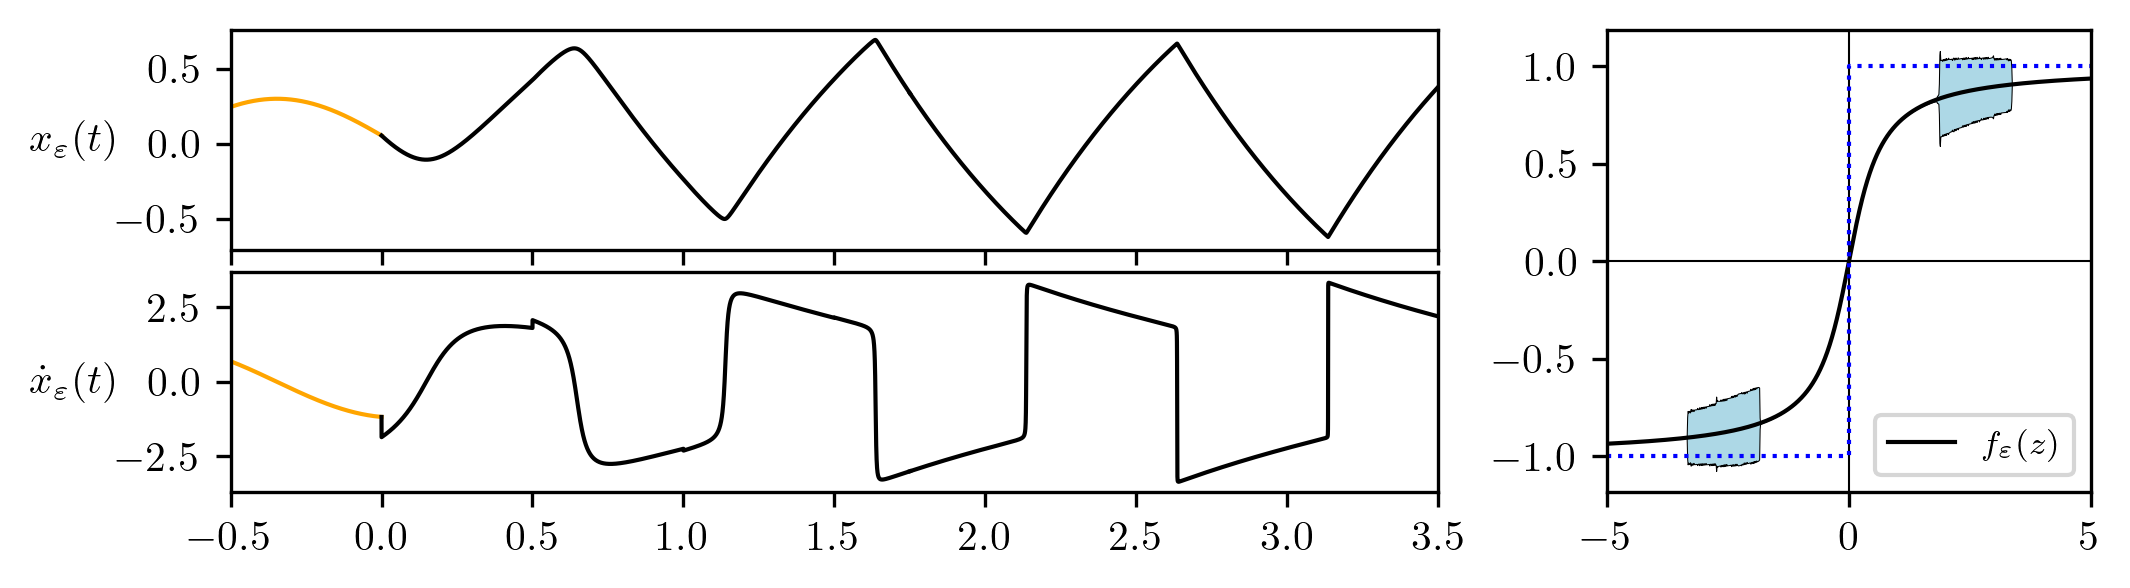

In [391]:
params = dict(
    h = 0.00019,
    t_finish = 50,
    
    T = 0.5,
    alpha = -3.,
    eps = 0.5,
    
    k=0,
    
    A=0, p = 0, mu = 0,
    # A=20, p = 12, mu = 0.052
    cos_a = 0.3, cos_w = 4, cos_gamma=1.3853,
)

compiler_params = dict(
    # RK = "RK98_",
    # REAL = "float64",
    # EQ = "RelayNDDEspikes",
    EQ = "RelayNDDE1arctan_sin",
    USE_SMOOTH_SOLUTION = True,
)

script = "equation_specific/ndde_regular_solution"

recompile=True
# recompile=False
        
ts, xs, dot_xs, reference, dot_reference, zs, fs, init_t, init_x, init_dot_x = my.run_cpp(script, params, compiler_params, recalculate=recalculate, recompile=recompile, flags = "-O3")    

# fig, ax = plt.subplots(1,1, figsize=(8,2),dpi=200)

fig = plt.figure(figsize=(8,2),dpi=300)

# gs = GridSpec(nrows=2, ncols=3, width_ratios=[1, 1, 1.3], height_ratios=[3,2],hspace=0.15,wspace=0.25)
gs = GridSpec(nrows=2, ncols=2, width_ratios=[3, 1.2], height_ratios=[2,2],hspace=0.1,wspace=0.2)

ax_sol  = plt.subplot(gs[0,0])
ax_dot  = plt.subplot(gs[1,0], sharex=ax_sol)
# ax_diff  = plt.subplot(gs[2,0], sharex=ax_sol)
ax_f  = plt.subplot(gs[:,1])


ax_f.plot(zs, fs, color='k', lw=1, label=r"$f_\varepsilon(z)$")
count, bins = np.histogram(dot_xs, bins=zs[::10], density=True)
count = 0.5*count
ax_f.fill_between(bins[1:], fs[10::10] - count, fs[10::10]+count, color='lightblue', alpha=1, edgecolor='k', lw=0.25)
ax_f.axhline(y=0, color='k', lw=0.5)
ax_f.axvline(x=0, color='k', lw=0.5)
ax_f.margins(x=0)
plot_sign = ax_f.plot([-5,0,0,5], [-1,-1,1,1], color='b',lw=1, linestyle=':')
plt.legend(loc='lower right',fontsize=8)



print(np.max(reference)/np.max(xs))
# xs = xs* np.max(reference[-1000:])/np.max(xs[-1000:])

shift = -0.27
# ax_sol.plot(ts - shift, reference,lw=1,c='r')
ax_sol.plot(init_t, init_x, lw=1, c='orange')
ax_sol.plot(ts, xs,lw=1,c='k')
# ax.plot(ts + 8*params["T"], xs-reference, lw=1)
# ax.plot(ts, xs-reference,lw=1,c='k')
ax_dot.plot(init_t, init_dot_x, lw=1, c='orange')

# ax_dot.plot(ts - shift, dot_reference,lw=1,c='r')
ax_dot.plot(ts, dot_xs,lw=1,c='k')

second_half = ts > params["t_finish"]/2

ax_sol.margins(x=0)

ax_sol.tick_params(axis='x', labelbottom=False)  # Hides x-axis tick labels for ax1

ax_sol.set_ylabel(r"$x_\varepsilon(t)$", rotation=0,labelpad=10,y=0.5, va='center')
ax_dot.set_ylabel(r"$\dot x_\varepsilon(t)$", rotation=0,labelpad=10,y=0.5, va='center')
# ax_sol.set_xticklabels([])  # Hide x-axis tick labels

# set_ticks([ax_sol, ax_dot], N=3)

# ax_sol.text(0.5, 0.5, r'\textcolor{red}{Red Text}', fontsize=15, ha='center')

# ax_diff.plot(ts, xs - reference*np.max(xs[second_half])/np.max(reference[second_half]), lw=1, c='blue')

# ax.margins(x=0)
# ax_sol.set_xlim(0, 10*params["T"])
ax_sol.set_xlim(-params["T"], 7*params["T"])
# ax_sol.set_xlim(params["t_finish"] - 2*params["T"],params["t_finish"])


plt.savefig(f"../output/{script.replace('/', '::')} {compiler_params} {params}.pdf", format="pdf", dpi=1000,bbox_inches='tight',pad_inches=0.01,transparent=True,backend='pgf')

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,2),dpi=200)
print(np.max(reference)/np.max(xs))
# xs = xs* np.max(reference[-1000:])/np.max(xs[-1000:])
ax.plot(ts, reference,lw=1,c='g')
# ax.plot(ts, dot_reference,lw=0.5,c='g')
# ax.plot(ts + 2*params["T"], xs, lw=1)
ax.plot(ts, xs,lw=1,c='k')
# ax.plot(ts, dot_xs,lw=0.5,c='k')
ax.margins(x=0)
ax.set_xlim(params["t_finish"] - 10*params["T"],params["t_finish"])

T = params["T"]
t_finish = params["t_finish"]



def animate(i):
    ax.set_xlim(T*2*i, T*(2*i+2))
    # return

ani = animation.FuncAnimation(fig, animate, repeat=True,
                                    frames=int(t_finish/(2*T)), interval=50)

writer = animation.PillowWriter(fps=10,
                                metadata=dict(artist='Me'),
                                bitrate=1800)

ani.save('time_series.gif', writer=writer)

In [ ]:
params = dict(
    h = 0.1,
    t_finish = 1000,
    
    tau = 20.0,
    alpha = -2.,
    sigma = 0.4,
    A_l = 1, A_r = 20, A_n=20,
    w_l = 0, w_r = 2, w_n=20
)

compiler_params = dict(
    RK = "RK98_",
    REAL = "float64"
)

script = "equation_specific/dde_clip_2_IC"

# recompile=True
recompile=False
        
As, ws, img = my.run_cpp(script, params, compiler_params, recalculate=recalculate, recompile=recompile, flags = "-O3")    

# fig, ax = plt.subplots(1,1, figsize=(8,2),dpi=300)
# ax.plot(ts, xs.T[0],lw=1)
# ax.margins(x=0)
# ax.set_xlim(params["t_finish"] - 100,params["t_finish"])

In [ ]:
print(As,ws)
# print(img)

fig = plt.figure(figsize=(3,3),dpi=200)
gs = GridSpec(nrows=1, ncols=1)
ax  = plt.subplot(gs[0,0])


ax.imshow(img.T,
            # cmap="Greys",
            cmap="inferno",
            # cmap="seismic",
            # cmap=lyapunov_cmap,
            # clim=(-1.57, 1.57),
            # clim=(-2, 2),
            #clim=(1, np.max(image_values)//2),
            origin='lower',
            # norm=colors.PowerNorm(gamma=0.5),
          extent=(
          params["A_l"],params["A_r"],params["w_l"],params["w_r"]),
          # aspect=abs((x_to - x_from) / (y_to - y_from)),
          aspect='auto',
          interpolation='nearest')

# ax.set_xlim(params["A_l"], params["A_r"])
# ax.set_ylim(1, 5)

# ax.plot(a_stars, taus, c='white')

# plt.savefig(f"../output/{output_filename}.pdf", format="pdf", dpi=1000,bbox_inches='tight',pad_inches=0.01,transparent=True)
# plt.savefig(f"../output/{output_filename}.jpg", format="jpg", dpi=1000,bbox_inches='tight',pad_inches=0.01,transparent=True)

In [ ]:
params = dict(
    h = 0.01,
    t_finish = 600,
    
    tau = 20.0,
    alpha = -2.,
    sigma = 0.4,
    
    A = 3,
    w = 0.75,
)

compiler_params = dict(
    RK = "RK98_",
    REAL = "float64"
)

script = "equation_specific/dde_clip_2_solution"

recompile=True
# recompile=False
        
ts1, xs1 = my.run_cpp(script, params, compiler_params, recalculate=recalculate, recompile=recompile, flags = "-O3")    

fig, ax = plt.subplots(1,1, figsize=(8,2),dpi=300)
ax.plot(ts, xs.T[0],lw=1)
ax.plot(ts1, xs1.T[0],lw=1)
ax.margins(x=0)
# ax.set_xlim(params["t_finish"] - 100,params["t_finish"])

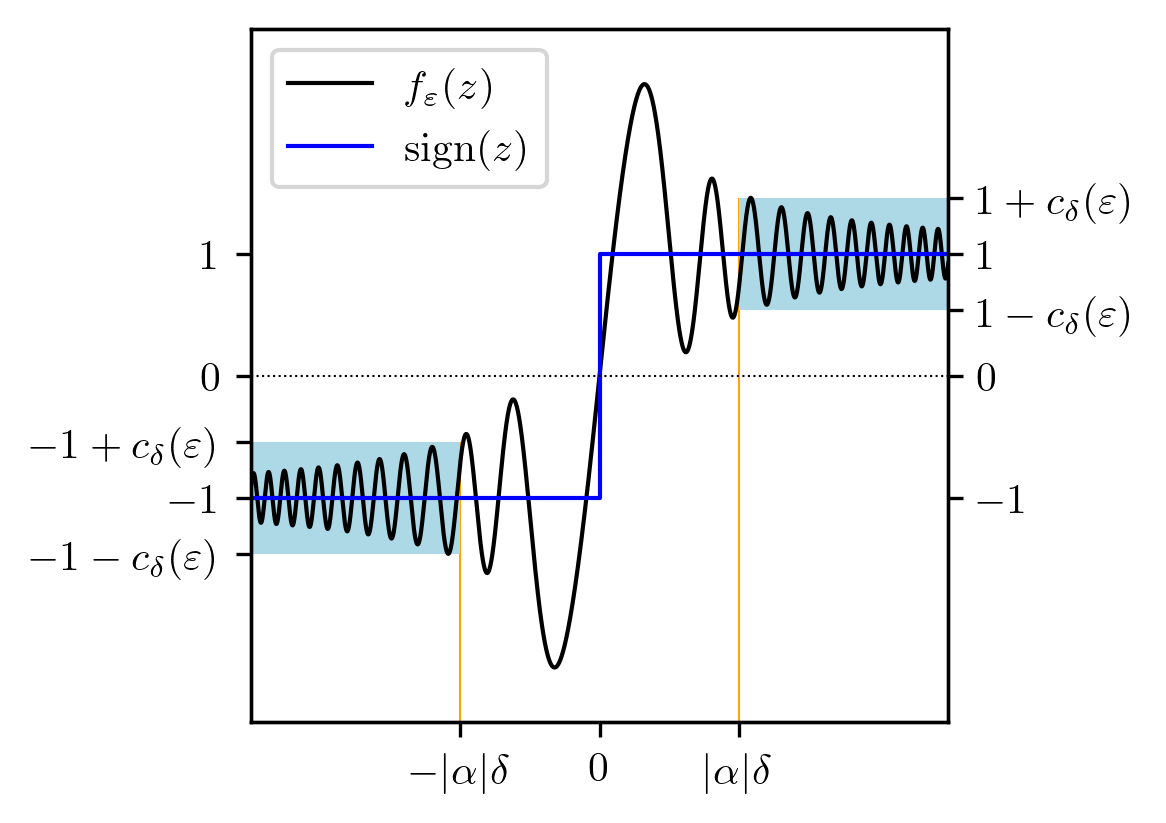

In [392]:
z = np.linspace(-5,5, 10000)
def ff(z):
    
    return (np.exp(5*z)-1)/(np.exp(5*z)+1) + (1*np.sin(3*z*z))/(z);
f = ff(z)

alpha_delta = 2.
mask = np.abs(z) > alpha_delta
C = np.max(np.abs(np.abs(f[mask])-1.))


fig, ax_f = plt.subplots(1,1, figsize=(3,3),dpi=300)
plot_f = ax_f.plot(z, f,color='k', lw=1, label=r"$f_\varepsilon(z)$")
plot_sign = ax_f.plot([-5,0,0,5], [-1,-1,1,1], color='b',lw=1, label=r"$\mathrm{sign}(z)$")

# ax_f.legend(handles = [plot_f],loc=3)
plt.legend(loc='upper left')

# count, bins = np.histogram(dot_xs, bins=zs[::10], density=True)
# count = 0.5*count
# ax_f.fill_between(bins[1:], fs[10::10] - count, fs[10::10]+count, color='lightblue', alpha=1, edgecolor='k', lw=0.25)
# count, bins = np.histogram(dot_xs, bins=1000, density=True)
# ax_f.plot(bins, count)


# ax_f.set_ylim(-1.1,1.1)
# ax_f.axhline(y=0, xmin=0, xmax=2, color='r')
# ax_f.hlines(y= 1, xmin=0, xmax=5, color='k', linestyle=':', lw=0.5)
# ax_f.hlines(y=-1, xmin=-5, xmax=0, color='k', linestyle=':', lw=0.5)
# ax_f.vlines(x=0, ymin=-1, ymax=1, color='k', linestyle=':', lw=0.5)
ax_f.axhline(y=0, color='k', lw=0.5, linestyle=':')
ax_f.margins(x=0)

ax_f.set_ylim(-1-4*C, 1+4*C)


vl1 = ax_f.vlines(x=alpha_delta, ymin=-30,ymax=1+C,color='orange',lw=0.5,zorder=-10)
vl1 = ax_f.vlines(x=-alpha_delta, ymin=-30,ymax=-1+C,color='orange',lw=0.5,zorder=-10)

# ax_f.axvline(x=-alpha_delta,ymin=0,ymax=1,color='blue',lw=0.5)
# ax_f.hlines(y=1+C, xmin=alpha_delta, xmax=5, color='k', lw=0.5)
# ax_f.hlines(y=1-C, xmin=alpha_delta, xmax=5, color='k', lw=0.5)

ax_f.fill_between([alpha_delta, 5], [1-C,1-C], [1+C,1+C], color='lightblue', alpha=1, edgecolor='k', lw=0.)
ax_f.fill_between([-alpha_delta, -5], [-1-C,-1-C], [-1+C,-1+C], color='lightblue', alpha=1, edgecolor='k', lw=0.)

ax_fr = ax_f.twinx()
ax_fr.set_ylim(ax_f.get_ylim())  # Set the right axis limits to match the left axis

ax_f.set_yticks([-1, 0, 1, -1-C, -1+C],
    labels=[r"$-1 \phantom{-c_\delta(\varepsilon)}$ ","$0$","$1$",
            r"$-1 - c_\delta(\varepsilon)$",
            r"$-1 + c_\delta(\varepsilon)$"])

ax_fr.set_yticks([-1, 0, 1, 1-C, 1+C],
    labels=["$-1$","$0$","$1$",
            r"$1 - c_\delta(\varepsilon)$",
            r"$1 + c_\delta(\varepsilon)$"])

ax_f.set_xticks([0, -alpha_delta, alpha_delta],
    labels=["$0$",
            r"$-|\alpha|\delta$",
            r"$|\alpha|\delta$",])

# Add ticks on both the left and right sides of the vertical axis
# ax_f.yaxis.tick_left()  # Ensure ticks on the left
# ax_f.yaxis.set_ticks_position('both')  # Enable ticks on both left and right

# ax_f.axhline(y=-1+C, color='k', lw=0.5)
# ax_f.axhline(y=-1-C, color='k', lw=0.5)


plt.savefig(f"../output/f_epsilon.pdf", 
            format="pdf", dpi=1000,bbox_inches='tight',pad_inches=0.01,transparent=True,backend='pgf')
